<a href="https://colab.research.google.com/github/ZoubirCHATTI/01__Linear-Algebra/blob/main/01_Basis%20statistics/Basic_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BASIC STATISTICS WITH PYTHON**

**Introduction:**
This notebook provides a concise introduction to fundamental statistical concepts and operations, including histograms, frequency density, measures of central tendency (mean), measures of variability (variance, range, percentiles), and the role of statistical estimators.

The main Python libraries used are:
NumPy for numerical computations
Matplotlib for data visualization
SciPy for statistical functions

At this stage, all examples use synthetic data (e.g., temperature readings, investment growth rates) to demonstrate the methods.

In future projects, similar operations will be applied to real-world datasets to perform more advanced analyses in data science and signal processing.

In [35]:
#Importing necessary libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## **01_Frequency/Histogram**

In [36]:
#Generating a synthetic dice rolling 1000 times
rollings=np.random.randint(1 , 7 , 1000)

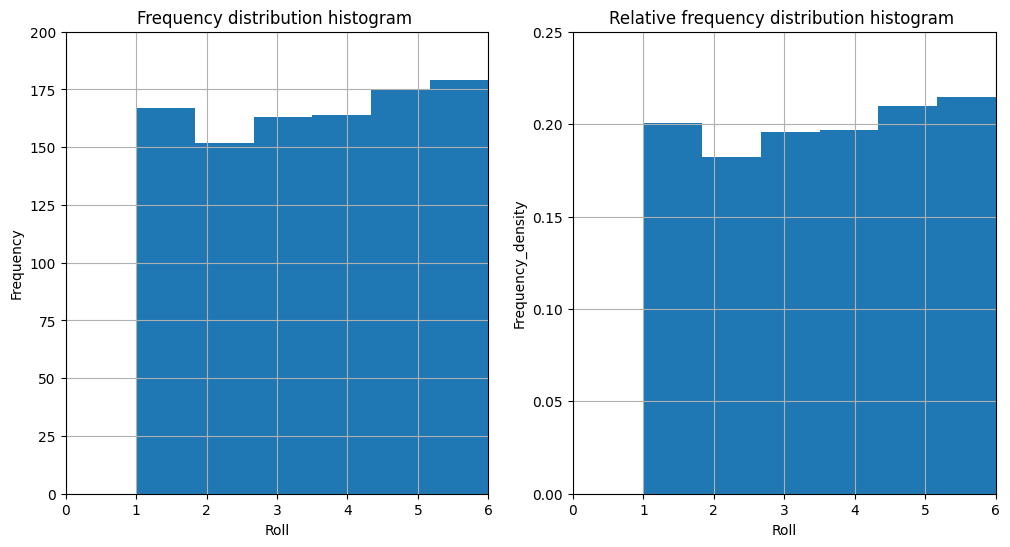

In [37]:
#Plotting the frequency distribution and relative frequency histogaram of 1000 times dice rolls
fig, (ax1, ax2)=plt.subplots(1 , 2 ,figsize=(12 , 6))
n, bins, patches=ax1.hist(rollings, bins=6)
ax1.set_xlabel('Roll')
ax1.set_xlim(0 , 6)
ax1.set_ylabel('Frequency')
ax1.set_ylim(0 , 200)
ax1.set_title("Frequency distribution histogram ")
ax1.grid(True)
n_, bins_, patches_=ax2.hist(rollings, bins=6, density=True)
ax2.set_xlabel('Roll')
ax2.set_xlim(0 , 6)
ax2.set_ylabel('Frequency_density')
ax2.set_ylim(0 , 0.25)
ax2.set_title("Relative frequency distribution histogram ")
ax2.grid(True)

In the following section, we generate a synthetic dataset of 1000 observation drawn from a standard normal distribution (loc=0, scale=1), we then visualize relative frequency and cumulative frequency

In [38]:
#We generate random normal distribution of loc=0 and std=1
random_dataset=np.random.normal(0, 1, size=1000)

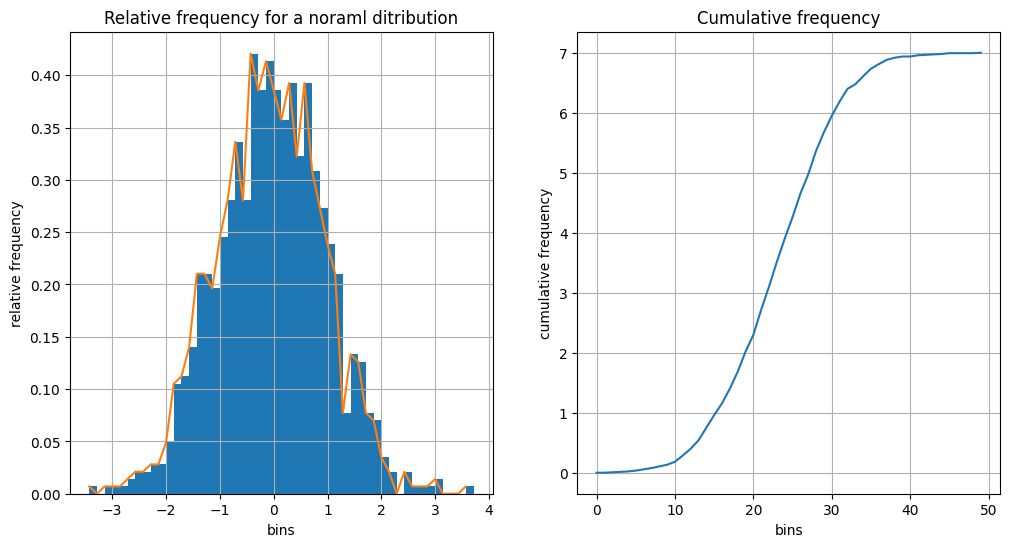

In [39]:
#Visualization of the random normal distribution
fig, (ax1, ax2) =plt.subplots(1 , 2 , figsize=(12 , 6 ))
n, bins, patches=ax1.hist(random_dataset, bins=50, density=True)          #Display the histogram of relative frequency
ax1.set_xlabel('bins')
ax1.set_ylabel('relative frequency')
ax1.plot(bins[:50], n)                                                    #Relative frequency in the form of plot rather than bars
ax1.set_title('Relative frequency for a noraml ditribution')
ax1.grid()
ax2.plot(np.cumsum(n))                                                    #Frequency density
ax2.set_xlabel('bins')
ax2.set_ylabel('cumulative frequency')
ax2.set_title('Cumulative frequency')
ax2.grid()

**01_Relative Frequency Histogram**

Shows the proportion of data points falling within each bin.

The histogram is normalized (density=True), so the total area equals 1.

The relative frequency is also plotted as a line to make the distribution shape more visible.

**02_Cumulative Frequency Plot**

Displays the running total of the relative frequencies.

Useful for identifying percentiles and understanding how the distribution accumulates probability mass.

# **02_Basic numeric descriptives**

# **Measure of location: arithmetic/geometric mean**

This section focuses on two main descriptives in statistics, we will explain the difference between the two descriptives using a simple example:
Let us simulate a portfolio manager returns recorded between 2015 and 2020,
we will compare the growth rate using arithmetic mean and geometric mean

In [40]:
#We generate a synthetic portfolio manager returns between the years 2015 and 2021
growth_rate=np.array([np.arange(2015, 2021, 1), [.36, .23, -.48,- .3, .15, .31 ]])

/tmp/ipython-input-2106958039.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


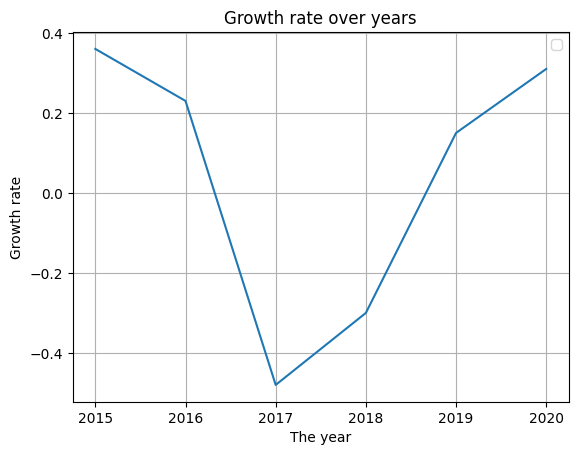

In [41]:
#Plot of the yearly growth rates
plt.plot(growth_rate[0] ,  growth_rate[1])
plt.xlabel('The year')
plt.ylabel('Growth rate')
plt.title("Growth rate over years")
plt.legend()
plt.grid(True)

In [42]:
#Arithmetic mean
arithmetic_mean=np.mean(growth_rate[1])
print(f"the arithmetic mean of the synthetic growth rate data is {arithmetic_mean:.3f} ")

the arithmetic mean of the synthetic growth rate data is 0.045 


In [43]:
#Geometric mean
geometric_mean=sp.stats.mstats.gmean(growth_rate[1]+1)-1  #We add one, so we convert returns to growth factors before computing, and then we substract one to go back to return
print(f"the geometric mean of the synthetic growth rate data is {geometric_mean:.3f} ")

the geometric mean of the synthetic growth rate data is -0.014 


In [44]:
#Let us assume we invested 100$:
#Using arithmic mean
gain1=100*(arithmetic_mean+1)**6
print(f"estimated gain using arithmic mean over 6 years is {gain1:.3f}")
#Using geometric mean
gain2=100*(geometric_mean+1)**6
print(f"estimated gain using geometric mean over 6 years is {gain2:.3f}")

estimated gain using arithmic mean over 6 years is 130.226
estimated gain using geometric mean over 6 years is 91.731


From the gain values, we see how critical is the choose of the right parameter in statistics, the gain using arithmetic mean is positive while using geometric mean is negative.
This is due to the compound effect, which means that each year growth  is not calculated from the initial principle, but from the total accumulated amount so far

# **Measure od variability**

In this section we will focus on some descriptives that describe the variability of datasets (range, percentile, variance), synthetic examples are also used to explain the concepts

In [45]:
#Measure of range
x=np.random.randn(50)
full_range=x.max()-x.min()
print(full_range)

5.106262732391538


In [46]:
#Percentile:
upper_percentile , lower_percentile=np.percentile(x,  [95 , 5])
print(upper_percentile, lower_percentile)

1.5499566771722204 -1.602308432638286


In [47]:
#Percentile range
percentile_range=upper_percentile-lower_percentile

**Example of use of range and percentile range**

To illustrate measures of variability, we simulate temperature recordings over 100 days in a city:

Extreme temperatures (10 days) represent rare weather events, both unusually cold and unusually hot.

Usual temperatures (90 days) represent typical daily values for the city.

We calculate two measures:

Full range — the difference between the maximum and minimum observed temperatures. This captures the absolute extremes of the dataset.

Percentile range (5th–95th) — the difference between the 95th and 5th percentiles. This measure focuses on the typical spread of values, reducing the influence of rare extremes.

This example shows how the percentile range can give a more realistic picture of usual temperature variation, while the full range includes rare events that may skew the perception of variability.

In [48]:
#Generating synthetic temperature recording over 100 days
specific_temperatures=np.array([-15 , -5 , -1, 0 , 2 , 35 , 42 , 41 , 43, 40])    #Assuming 10 days of sepecific (extreme) temperatures
usual_temperatures=np.linspace(15, 30, 90)                                        #Assuming 90 days of usual city temperature
T=np.concatenate((specific_temperatures, usual_temperatures))                     #Concatinating to get 100 days temperature

In [49]:
#Calculating the full range of temperature
full_range=T.max()-T.min()

In [50]:
#Calculating percentile range of temperature
upper_percentile, lower_percentile=np.percentile(T, [95 , 5])
percentile_range=upper_percentile-lower_percentile

In [51]:
print(f"The full range={full_range:.2f}\npercentile range={percentile_range:.2f}")

The full range=58.00
percentile range=15.90


**Variance and estimator**

Population is the entire group we want to study, since sample is a samller group from the population when it is hard to study the entire the population.
Let us assume that we know the studied parameter for all the population (for instance, adult heights in the world),and let us say that the number of addults in the world is 10000, with the heights are modeled by a normal distribution
of loc=170, and scale=10

In [52]:
#Variance of a population and sample:
Heights_population=np.random.normal(loc=170, scale=10, size=10000)
#We calculate the variance of the population using np.var
pop_var=np.var(Heights_population)
print(pop_var)

101.32188760741035


In [53]:
#In case we can not measure the entire population heights, we choose a sample (of 100 for instance):
sample=np.random.choice(Heights_population, size=100)
sample_var=np.var(sample, ddof=1)               #the variance of the sample using Bessel's correction
print(sample_var)

96.41772559509855


Althought we chose a small sample compared to all the population, we see how accurate the unbiased estimator could estimate the varince compared to real variance of the population

**Estimators for huge number of samples**

In this section , we will try estimating variance for 10000 samples, and then taking the mean of all these varinaces to see how powerful an unbiased estimator in statistics

In [54]:
#The power of estimators
variances=[]                                     #Create an empty list to store all the variances
for i in range(10000):
  samples=np.random.choice(sample, size=100)     #Choosing 10000 samples of size 100, and calculating the variance of each sample
  sample_variance=np.var(samples, ddof=1)        #variance of each sample, using unbiased estimator (var=sum(observation-sample_mean)/(n-1)) [Bessel's correction]
  variances.append(sample_variance)              #Storing the different variances in the list variances

In [55]:
#Taking the mean of the variances of all the samples
mean_value=np.mean(variances)

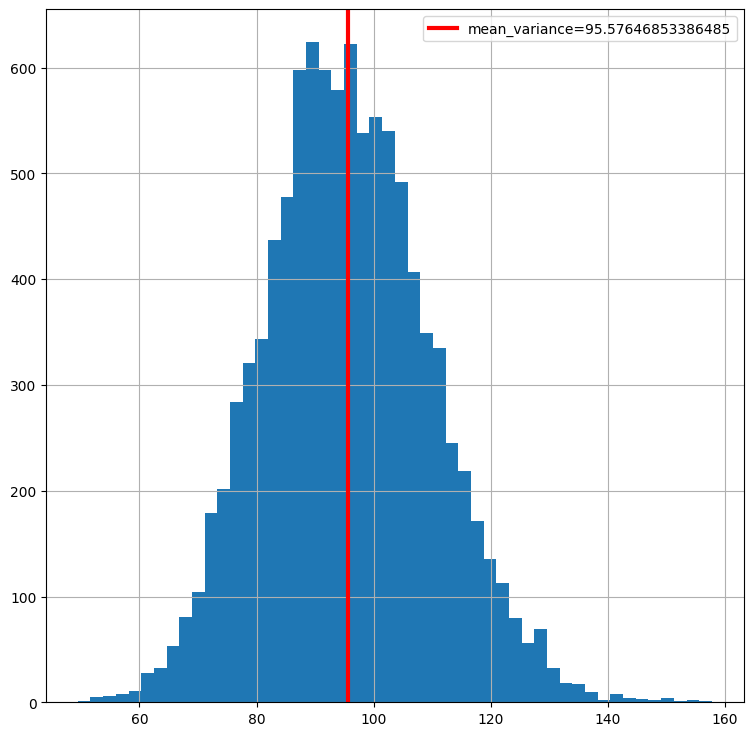

In [56]:
#plot of different varinces histogram
fig, ax=plt.subplots(figsize=(9 , 9))
n, bins, patches=ax.hist(variances, bins=50)
ax.grid()
ax.axvline(x=mean_value, lw=3, color='r', label=f"mean_variance={mean_value}")
ax.legend()

We see that the variance estimated by the unbiased estimator is very close to the variance of the population, even if we have few samples, we still able to estimate the variance with high accuracy